In [1]:
# Import Basic Library.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# import zscore library to treat Outlier.
from scipy.stats import zscore

# import sklearn libraires for preprocessing and model evaluation.
from sklearn. preprocessing  import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import IsolationForest,RandomForestClassifier,GradientBoostingClassifier,StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier

# import Sklearn metrics to evaluate the performance of the Machine learning models.
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,r2_score,f1_score,roc_auc_score

#import randint and uniform to generate the random numbers within specified ranges.
from scipy.stats import randint, uniform

In [2]:
# Load the Train dataset
train_data = pd.read_csv('train_loan_data (1).csv')
train_data.head()

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,Jul-97,10+ years,Deputy,744,740,E,MORTGAGE,Individual,...,0.0,debt_consolidation,5338,93.6,E1,60 months,Debt consolidation,8,Source Verified,Defaulted
1,CA,40000.0,Apr-87,10+ years,Department of Veterans Affairs,724,720,B,RENT,Individual,...,0.0,debt_consolidation,19944,60.3,B1,36 months,Credit Loan,12,Verified,Paid
2,FL,60000.0,Aug-07,10+ years,Marble polishing,679,675,B,MORTGAGE,Individual,...,0.0,debt_consolidation,23199,88.5,B5,36 months,Debt consolidation,16,Source Verified,Paid
3,IL,100742.0,Sep-80,10+ years,printer,664,660,B,MORTGAGE,Individual,...,0.0,debt_consolidation,18425,69.0,B2,36 months,Debt consolidation,19,Source Verified,Paid
4,MD,80000.0,Jul-99,10+ years,Southern Mgmt,669,665,F,RENT,Individual,...,0.0,debt_consolidation,34370,90.0,F5,60 months,Debt Connsolidation,59,Verified,Paid


In [3]:
# Display the top five.
train_data.tail()

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
79995,SC,81000.0,Feb-00,10+ years,Sports Group Manager,664,660,G,MORTGAGE,Individual,...,0.0,debt_consolidation,20201,93.5,G3,60 months,Debt consolidation,42,Verified,Defaulted
79996,NH,45000.0,Aug-95,10+ years,Web Designer,684,680,C,MORTGAGE,Individual,...,0.0,debt_consolidation,6145,56.9,C1,36 months,Debt consolidation,14,Not Verified,Paid
79997,NY,90000.0,Apr-05,< 1 year,Program Officer,724,720,B,OWN,Individual,...,0.0,debt_consolidation,3910,25.6,B4,36 months,Debt consolidation,26,Source Verified,Paid
79998,TX,94000.0,Apr-92,3 years,Sr. Business Analyst,669,665,D,MORTGAGE,Individual,...,1.0,credit_card,11897,49.4,D5,60 months,Credit card refinancing,48,Source Verified,Paid
79999,NY,1100000.0,Jun-99,2 years,Managing Director,664,660,B,MORTGAGE,Individual,...,0.0,debt_consolidation,586259,96.7,B4,36 months,Debt consolidation,32,Source Verified,Paid


In [4]:
train_data.columns

Index(['addr_state', 'annual_inc', 'earliest_cr_line', 'emp_length',
       'emp_title', 'fico_range_high', 'fico_range_low', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util',
       'sub_grade', 'term', 'title', 'total_acc', 'verification_status',
       'loan_status'],
      dtype='object')

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            80000 non-null  object 
 1   annual_inc            80000 non-null  float64
 2   earliest_cr_line      80000 non-null  object 
 3   emp_length            75412 non-null  object 
 4   emp_title             74982 non-null  object 
 5   fico_range_high       80000 non-null  int64  
 6   fico_range_low        80000 non-null  int64  
 7   grade                 80000 non-null  object 
 8   home_ownership        80000 non-null  object 
 9   application_type      80000 non-null  object 
 10  initial_list_status   80000 non-null  object 
 11  int_rate              80000 non-null  float64
 12  loan_amnt             80000 non-null  int64  
 13  num_actv_bc_tl        76052 non-null  float64
 14  mort_acc              77229 non-null  float64
 15  tot_cur_bal        

In [6]:
# Display the summary
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
annual_inc,80000.0,76046.143138,69020.055377,0.00,46000.00,65000.00,90000.00,7141778.00
fico_range_high,80000.0,699.987975,31.734840,664.00,674.00,694.00,714.00,850.00
fico_range_low,80000.0,695.987813,31.734075,660.00,670.00,690.00,710.00,845.00
int_rate,80000.0,13.232898,4.771705,5.31,9.75,12.74,15.99,30.99
loan_amnt,80000.0,14403.867813,8703.826298,750.00,7925.00,12000.00,20000.00,40000.00
num_actv_bc_tl,76052.0,3.633790,2.262505,0.00,2.00,3.00,5.00,32.00
mort_acc,77229.0,1.674759,2.005104,0.00,0.00,1.00,3.00,32.00
tot_cur_bal,76052.0,141586.358991,159371.366632,0.00,29642.00,81000.50,211027.25,5172185.00
open_acc,80000.0,11.605675,5.483362,1.00,8.00,11.00,14.00,80.00
pub_rec,80000.0,0.216675,0.579854,0.00,0.00,0.00,0.00,24.00


In [7]:
# Display the Target variable
train_data['loan_status'].value_counts()

Paid         64030
Defaulted    15970
Name: loan_status, dtype: int64

# let's change the target variable into Numerical value
train_data['loan_status'] = train_data['loan_status'].map({'Paid':0,'Defaulted':1})

In [8]:
# Display the emp_length
train_data['emp_length'].value_counts()

10+ years    26278
2 years       7319
3 years       6474
< 1 year      6297
1 year        5294
5 years       5094
4 years       4763
6 years       3691
7 years       3597
8 years       3583
9 years       3022
Name: emp_length, dtype: int64

In [9]:
# change the emp_length into numercial values(to Years)
train_data['emp_length']=train_data['emp_length'].map({'< 1 year':0,'1 year ':1,'2 years':2,'3 years':3,'4 years':4,'5 years':5,'6 years':6,'7 years':7,'8 years':8,'9 years':9,'10+ years':10})

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            80000 non-null  object 
 1   annual_inc            80000 non-null  float64
 2   earliest_cr_line      80000 non-null  object 
 3   emp_length            70118 non-null  float64
 4   emp_title             74982 non-null  object 
 5   fico_range_high       80000 non-null  int64  
 6   fico_range_low        80000 non-null  int64  
 7   grade                 80000 non-null  object 
 8   home_ownership        80000 non-null  object 
 9   application_type      80000 non-null  object 
 10  initial_list_status   80000 non-null  object 
 11  int_rate              80000 non-null  float64
 12  loan_amnt             80000 non-null  int64  
 13  num_actv_bc_tl        76052 non-null  float64
 14  mort_acc              77229 non-null  float64
 15  tot_cur_bal        

# Handle missing values

In [11]:
missing_value = pd.DataFrame({'Null_values':train_data.isnull().sum()/len(train_data)*100})

In [12]:
missing_value

,Null_values
addr_state,0.00000
annual_inc,0.00000
earliest_cr_line,0.00000
emp_length,12.35250
emp_title,6.27250
fico_range_high,0.00000
fico_range_low,0.00000
grade,0.00000
home_ownership,0.00000
application_type,0.00000


<b> Observation:</b> from the above observation Dataframe. I can say that,Emp_length is 12.35%, empl_title is 6.27%,num_actv_bc_tl is 4.93%,mort_acc is 3.46%, tot_cur_bal is 4.93% , pub_rec_bankruptcies is 0.04, revol_bal is 0.07% and title is 1.21 are missing values.

In [13]:
#  Impute missing values in emp_length with the mode
train_data['emp_length'].fillna(train_data['emp_length'].mode()[0], inplace=True)

# Impute missing values in numeric columns with median
numeric_columns = ['num_actv_bc_tl', 'mort_acc', 'tot_cur_bal']
for col in numeric_columns:
    train_data[col].fillna(train_data[col].median(), inplace=True)

# Drop rows with missing values in pub_rec_bankruptcies
train_data.dropna(subset=['pub_rec_bankruptcies'], inplace=True)

# Impute missing values in revol_util with median
train_data['revol_util'].fillna(train_data['revol_util'].median(), inplace=True)

# Considering dropping emp_title and title columns
train_data.drop(['emp_title', 'title'], axis=1, inplace=True)

In [14]:
train_data.isnull().sum()

addr_state              0
annual_inc              0
earliest_cr_line        0
emp_length              0
fico_range_high         0
fico_range_low          0
grade                   0
home_ownership          0
application_type        0
initial_list_status     0
int_rate                0
loan_amnt               0
num_actv_bc_tl          0
mort_acc                0
tot_cur_bal             0
open_acc                0
pub_rec                 0
pub_rec_bankruptcies    0
purpose                 0
revol_bal               0
revol_util              0
sub_grade               0
term                    0
total_acc               0
verification_status     0
loan_status             0
dtype: int64

### Handle Outliers

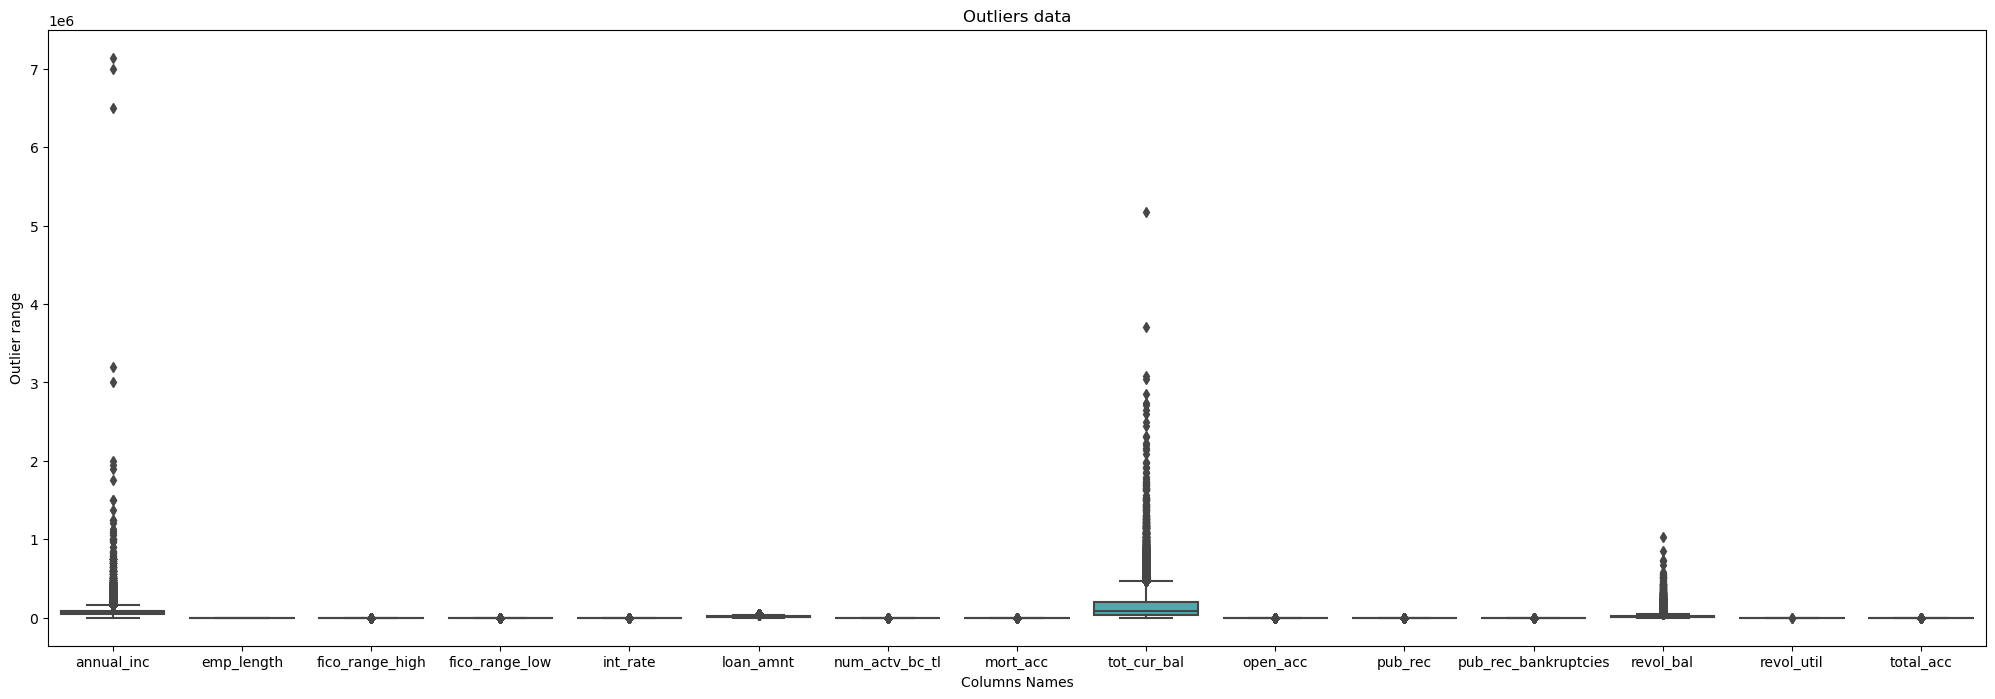

In [15]:
# Lets see the outliers in visualization part
plt.figure(figsize=(25,8))
sns.boxplot(train_data)
plt.title('Outliers data')
plt.xlabel('Columns Names')
plt.ylabel('Outlier range')
plt.show()

Observation:  From the Above chart we can clearly see that there are outliers, we need to treat.

In [16]:
train_data.columns

Index(['addr_state', 'annual_inc', 'earliest_cr_line', 'emp_length',
       'fico_range_high', 'fico_range_low', 'grade', 'home_ownership',
       'application_type', 'initial_list_status', 'int_rate', 'loan_amnt',
       'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc', 'pub_rec',
       'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util',
       'sub_grade', 'term', 'total_acc', 'verification_status', 'loan_status'],
      dtype='object')

In [17]:
z_score = train_data[['tot_cur_bal','revol_bal']].apply(zscore)
Z_score_threshhold = 3 # threshhold  

# identify Outliers 
outliers = (z_score.abs() > Z_score_threshhold)

In [18]:
# lets check the count of Outliers 
Outlier_counts = outliers.sum()
print(f'Count of Outliers :\n{Outlier_counts} ')

print("The above are the outliers which are need to be removed from the trained data.")

Count of Outliers :
tot_cur_bal    1149
revol_bal      1017
dtype: int64 
The above are the outliers which are need to be removed from the trained data.


### Outlier Treatement


In [19]:
# Identify the Outliers 

Ouliers_ = (z_score > Z_score_threshhold).any(axis =1 )

cleaned_data_ = train_data[~Ouliers_]

cleaned_data_.shape

(78111, 26)

## seems to be like Outliers have been removed from the dataset

In [20]:
# Separating the numercial and categorical variable
# using User Defined Function 

def data_types(dataset):
    ''' This function is separate the numerical and categorical variables
    '''
    Numerical_features = []
    Categorical_features = []
    
    for col in dataset.columns:
        if dataset[col].dtypes == 'object':
            Categorical_features.append(col)
        else:
            Numerical_features.append(col)
    return Numerical_features,Categorical_features

In [21]:
# Sepeate Numrical values and categorical variable
Numerical_feature,Categorical_feature = data_types(cleaned_data_)

In [22]:
Numerical_feature

['annual_inc',
 'emp_length',
 'fico_range_high',
 'fico_range_low',
 'int_rate',
 'loan_amnt',
 'num_actv_bc_tl',
 'mort_acc',
 'tot_cur_bal',
 'open_acc',
 'pub_rec',
 'pub_rec_bankruptcies',
 'revol_bal',
 'revol_util',
 'total_acc']

In [23]:
Categorical_feature

['addr_state',
 'earliest_cr_line',
 'grade',
 'home_ownership',
 'application_type',
 'initial_list_status',
 'purpose',
 'sub_grade',
 'term',
 'verification_status',
 'loan_status']

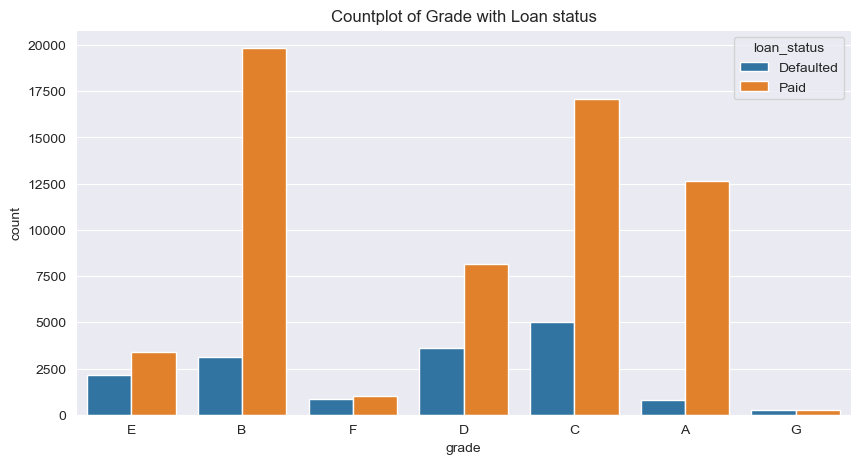

In [24]:
plt.figure(figsize=(10,5))
sns.set_style(style='darkgrid')
sns.countplot(data=cleaned_data_,x='grade',hue='loan_status')
plt.title('Countplot of Grade with Loan status')
plt.show()


Observation: from the above chart we can say that highest loan cleared from B grade and highest Defulaters are from Grade C

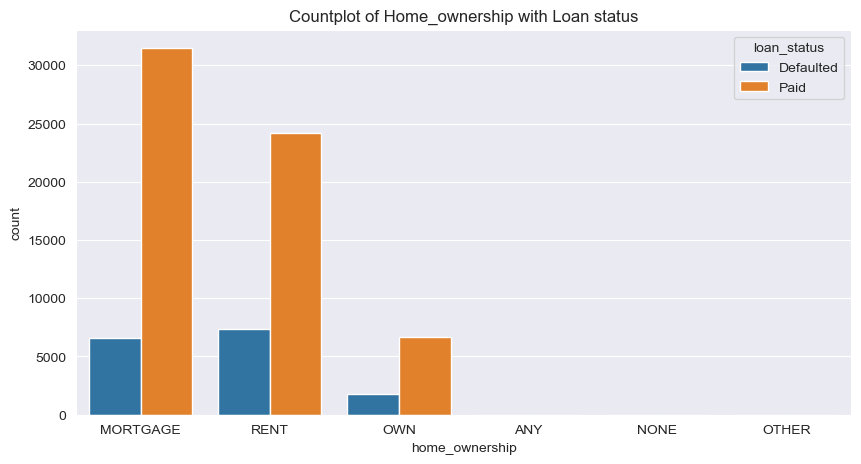

In [25]:
plt.figure(figsize=(10,5))
sns.set_style(style='darkgrid')
sns.countplot(data=cleaned_data_,x='home_ownership',hue='loan_status')
plt.title('Countplot of Home_ownership with Loan status')
plt.show()    

Observation: from the above chart we can say that, Mortagers has cleared the loan and highest defaulters are from Rent

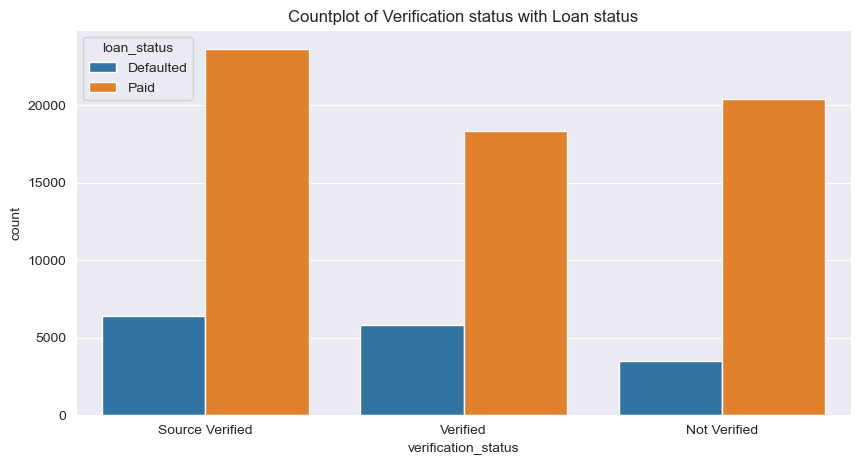

In [26]:
plt.figure(figsize=(10,5))
sns.set_style(style='darkgrid')
sns.countplot(data=cleaned_data_,x=cleaned_data_['verification_status'],hue=cleaned_data_['loan_status'])
plt.title('Countplot of Verification status with Loan status')
plt.show()    

Observation: from the above chart we can say the Most of them cleared as per verification status

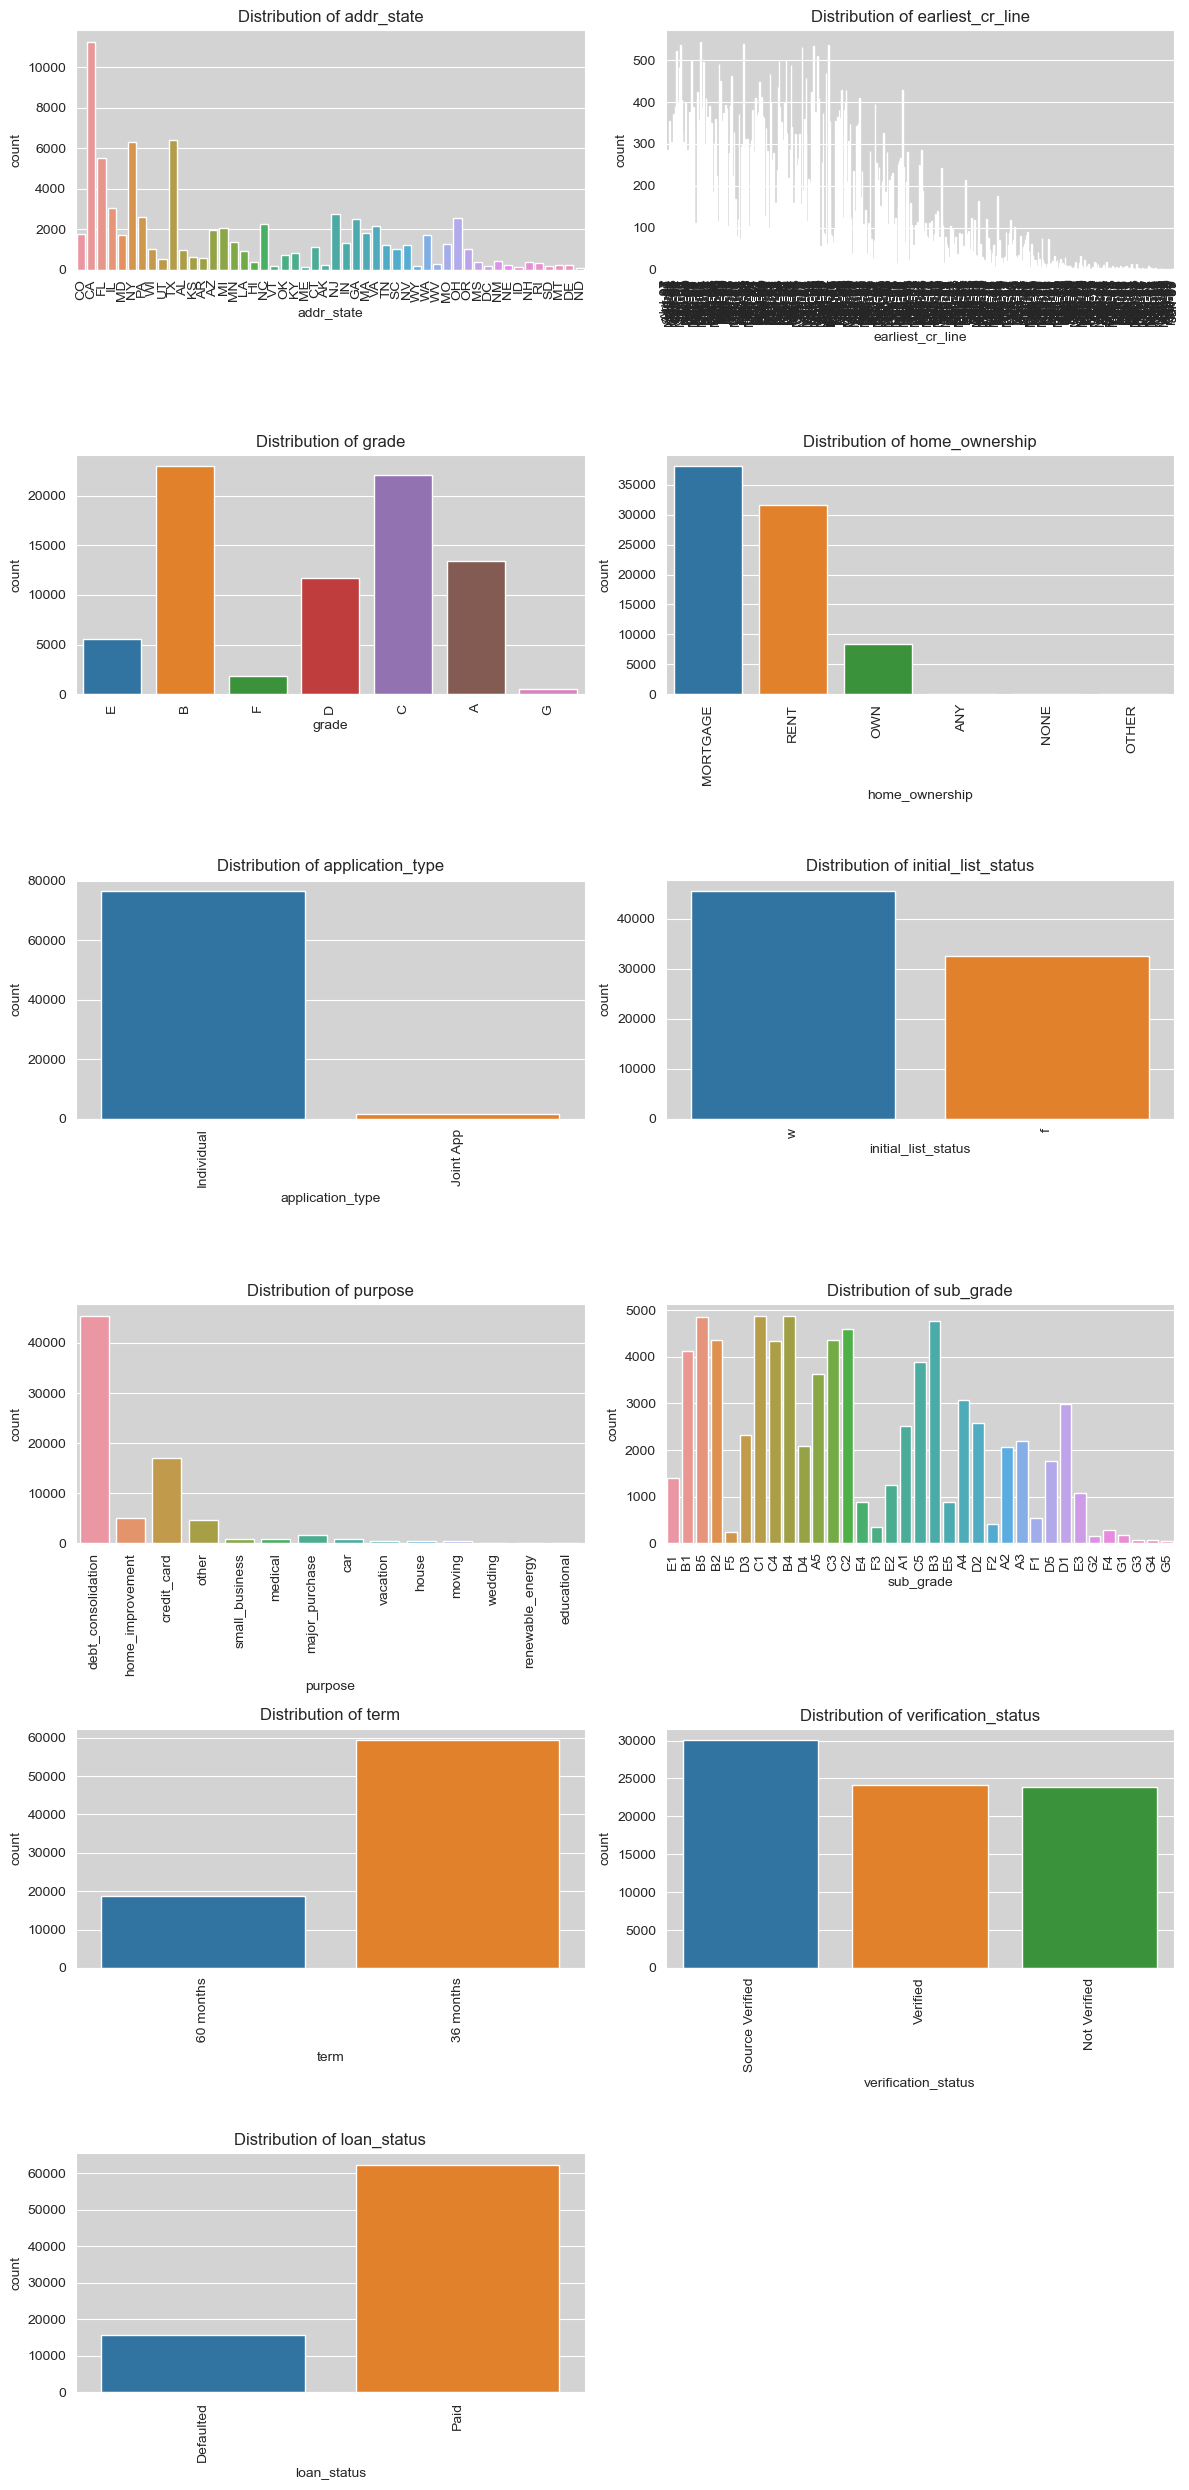

In [27]:
plt.figure(figsize=(12, 25))  # Set the overall figure size

# Loop through each categorical column.
for i, column in enumerate(Categorical_feature, 1):
    plt.subplot(6, 2, i)  # Create subplots in a 6x2 grid
    plt.gca().set_facecolor('lightgray')  # Set background color for each subplot
    sns.countplot(x=column, data=cleaned_data_)  # Create a count plot for the current column
    plt.title(f'Distribution of {column}')  # Set subplot title
    plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [28]:
# from the above chart we can see the target varible is very imbalanced.
## to clear that lets see the values counts of Responded column.

cleaned_data_['loan_status'].value_counts()

Paid         62384
Defaulted    15727
Name: loan_status, dtype: int64

Observation :- The target varible is hightly imbalanced.

### Feature Engineering
• Encode categorical data


In [29]:
# Display top 5 categorical data.
cleaned_data_[Categorical_feature].head(5)

,addr_state,earliest_cr_line,grade,home_ownership,application_type,initial_list_status,purpose,sub_grade,term,verification_status,loan_status
0,CO,Jul-97,E,MORTGAGE,Individual,w,debt_consolidation,E1,60 months,Source Verified,Defaulted
1,CA,Apr-87,B,RENT,Individual,w,debt_consolidation,B1,36 months,Verified,Paid
2,FL,Aug-07,B,MORTGAGE,Individual,w,debt_consolidation,B5,36 months,Source Verified,Paid
3,IL,Sep-80,B,MORTGAGE,Individual,w,debt_consolidation,B2,36 months,Source Verified,Paid
4,MD,Jul-99,F,RENT,Individual,f,debt_consolidation,F5,60 months,Verified,Paid


In [30]:
#  convert the categorical data into encoding with the help of label encoder

label_encoder = LabelEncoder()

# encoding label to all categoricals

for col in Categorical_feature:
    cleaned_data_[col] =  label_encoder.fit_transform(cleaned_data_[col])
    
# Display cleaned data
cleaned_data_

,addr_state,annual_inc,earliest_cr_line,emp_length,fico_range_high,fico_range_low,grade,home_ownership,application_type,initial_list_status,...,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,total_acc,verification_status,loan_status
0,5,85000.0,315,10.0,744,740,4,1,0,1,...,0,0.0,2,5338,93.6,20,1,8,1,0
1,4,40000.0,40,10.0,724,720,1,5,0,1,...,0,0.0,2,19944,60.3,5,0,12,2,1
2,9,60000.0,60,10.0,679,675,1,1,0,1,...,0,0.0,2,23199,88.5,9,0,16,1,1
3,13,100742.0,616,10.0,664,660,1,1,0,1,...,0,0.0,2,18425,69.0,6,0,19,1,1
4,19,80000.0,317,10.0,669,665,5,5,0,0,...,0,0.0,2,34370,90.0,29,1,59,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79994,41,60000.0,61,0.0,689,685,3,5,0,1,...,0,0.0,9,3095,36.4,17,0,10,1,1
79995,39,81000.0,155,10.0,664,660,6,1,0,1,...,0,0.0,2,20201,93.5,32,1,42,2,0
79996,29,45000.0,99,10.0,684,680,2,1,0,1,...,0,0.0,2,6145,56.9,10,0,14,0,1
79997,33,90000.0,5,0.0,724,720,1,4,0,1,...,0,0.0,2,3910,25.6,8,0,26,1,1


In [31]:
cleaned_data_.shape

(78111, 26)

In [32]:
## Define Scaler
sc_x = StandardScaler()

## Perform Scaling using fit_transform
cleaned_data_[Numerical_feature] = sc_x.fit_transform(cleaned_data_[Numerical_feature])

## Display data after scaling
cleaned_data_

,addr_state,annual_inc,earliest_cr_line,emp_length,fico_range_high,fico_range_low,grade,home_ownership,application_type,initial_list_status,...,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,total_acc,verification_status,loan_status
0,5,0.193417,315,0.909453,1.399240,1.399280,4,1,0,1,...,-0.376941,-0.361458,2,-0.729404,1.713565,20,1,-1.411701,1,0
1,4,-0.538068,40,0.909453,0.767452,0.767476,1,5,0,1,...,-0.376941,-0.361458,2,0.454941,0.350995,5,0,-1.076902,2,1
2,9,-0.212963,60,0.909453,-0.654070,-0.654081,1,1,0,1,...,-0.376941,-0.361458,2,0.718876,1.504883,9,0,-0.742103,1,1
3,13,0.449307,616,0.909453,-1.127911,-1.127934,1,1,0,1,...,-0.376941,-0.361458,2,0.331771,0.706982,6,0,-0.491004,1,1
4,19,0.112141,317,0.909453,-0.969964,-0.969983,5,5,0,0,...,-0.376941,-0.361458,2,1.624690,1.566260,29,1,2.856985,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79994,41,-0.212963,61,-1.918178,-0.338176,-0.338180,3,5,0,1,...,-0.376941,-0.361458,9,-0.911280,-0.626946,17,0,-1.244301,1,1
79995,39,0.128396,155,0.909453,-1.127911,-1.127934,6,1,0,1,...,-0.376941,-0.361458,2,0.475780,1.709473,32,1,1.434090,2,0
79996,29,-0.456792,99,0.909453,-0.496123,-0.496130,2,1,0,1,...,-0.376941,-0.361458,2,-0.663968,0.211873,10,0,-0.909502,0,1
79997,33,0.274693,5,-1.918178,0.767452,0.767476,1,4,0,1,...,-0.376941,-0.361458,2,-0.845195,-1.068861,8,0,0.094894,1,1


In [33]:
# let's split the data into Independent variable and Dependent Variable 
X = cleaned_data_.drop('loan_status', axis = 1)
y= cleaned_data_['loan_status']
print(X.shape)
print(y.shape)

(78111, 25)
(78111,)


In [34]:
from sklearn.model_selection import train_test_split

# Lets split the data into train and test with test size of 30%.
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

print(y_test.shape)

(54677, 25)
(23434, 25)
(54677,)
(23434,)


In [35]:
# as mentioned in above code the dataset is imbalnced
from imblearn.under_sampling import RandomUnderSampler # using Undersample to the training data
under_sampler = RandomUnderSampler(sampling_strategy=0.5)

x_train,y_train = under_sampler.fit_resample(x_train,y_train)

# Display the Shape of resampled 
print(x_train.shape)
print(y_train.shape)

(32940, 25)
(32940,)


In [36]:
# perform oversample on undersample train data
over_sample = SMOTE(sampling_strategy=0.6)
x_train_resampled,y_train_resampled  = over_sample.fit_resample(x_train,y_train)

In [37]:
# Display the shape of the over sample train data

print(x_train_resampled.shape)
print(y_train_resampled.shape)

(35136, 25)
(35136,)


### Model Selection
- Based on the target variable, This is Classification model
### Below are the Classification models.
Logistic Regression, Desicion Tree Classifier, Random Forest Classifier, Gradient Boosting Classifier, Support Vector Classifier,KNeighbours Classifier, XG Boosting Classifier

Model Training
Model _ Logistic Regression

In [38]:
# lets import Logistic Regression 
from sklearn.linear_model import LogisticRegression

# Define the Model
lr_ = LogisticRegression()

# Fit the model to the Resmapled train data
lr_.fit(x_train_resampled,y_train_resampled)

LogisticRegression()

In [39]:
from sklearn.metrics import accuracy_score,classification_report, roc_auc_score,r2_score,f1_score

Logistic Regression Accuracy score is : 0.7517282580865409
____________________________________________________________________________________________________
Logistic Regression roc_auc_score : 0.5967464034961134
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Logistic Regression Classification Report: 

               precision    recall  f1-score   support

           0       0.37      0.34      0.35      4747
           1       0.84      0.86      0.85     18687

    accuracy                           0.75     23434
   macro avg       0.61      0.60      0.60     23434
weighted avg       0.74      0.75      0.75     23434

____________________________________________________________________________________________________


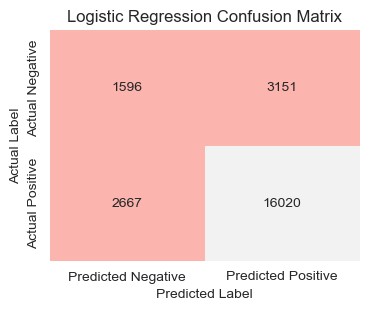

In [40]:
y_predict_lr_ = lr_.predict(x_test)

# accuracy score
lr_accuracy = accuracy_score(y_test,y_predict_lr_)
print('Logistic Regression Accuracy score is :',lr_accuracy)

print('_'*100)

## ROC AUC Score
lr_roc = roc_auc_score(y_test,y_predict_lr_)
print("Logistic Regression roc_auc_score :", lr_roc)

print('_'*100)

#Classification Report
lr_classification_report = classification_report(y_test,y_predict_lr_)

print('_'*100)
print('Logistic Regression Classification Report: \n\n', classification_report(y_test,y_predict_lr_))

# confusion matrix
lr_confusion = confusion_matrix(y_test,y_predict_lr_)
print('_'*100)


# Plotting the confusion matrix heatmap
plt.figure(figsize=(4,3))
sns.heatmap(lr_confusion, annot=True, fmt='g', cmap='Pastel1', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [41]:
dc_tree = DecisionTreeClassifier()
dc_tree.fit(x_train_resampled,y_train_resampled)

DecisionTreeClassifier()

Decision Tree Classifier Accuracy score is : 0.6244772552701203
____________________________________________________________________________________________________
Decision Tree Classifier  roc_auc_score : 0.549801876824211
____________________________________________________________________________________________________
Decision Tree Classifier Classification Report: 

               precision    recall  f1-score   support

           0       0.25      0.42      0.31      4747
           1       0.82      0.68      0.74     18687

    accuracy                           0.62     23434
   macro avg       0.54      0.55      0.53     23434
weighted avg       0.71      0.62      0.65     23434

____________________________________________________________________________________________________
____________________________________________________________________________________________________


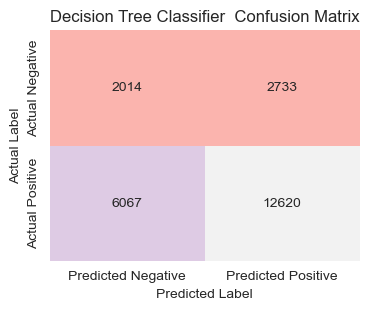

In [42]:
y_predict_dc_tree = dc_tree.predict(x_test)

# accuracy score
dc_accuracy_score = accuracy_score(y_test,y_predict_dc_tree)
print('Decision Tree Classifier Accuracy score is :',dc_accuracy_score)

print('_'*100)

## ROC AUC Score
dc_roc = roc_auc_score(y_test,y_predict_dc_tree)
print("Decision Tree Classifier  roc_auc_score :", dc_roc)

print('_'*100)

print('Decision Tree Classifier Classification Report: \n\n', classification_report(y_test,y_predict_dc_tree))

print('_'*100)

# confusion matrix
dc_confusion = confusion_matrix(y_test,y_predict_dc_tree)
print('_'*100)


# Plotting the confusion matrix heatmap
plt.figure(figsize=(4,3))
sns.heatmap(dc_confusion, annot=True, fmt='g', cmap='Pastel1', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.title('Decision Tree Classifier  Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [43]:
# Model 3 _ Random Forest Classifier
rf_ = RandomForestClassifier()
rf_.fit(x_train_resampled,y_train_resampled)

RandomForestClassifier()

Random Forest Classifier Accuracy score is : 0.7460527438764188
____________________________________________________________________________________________________
Random Forest Classifier  roc_auc_score : 0.606938074658188
____________________________________________________________________________________________________
Random Forest Classifier Classification Report: 

               precision    recall  f1-score   support

           0       0.37      0.37      0.37      4747
           1       0.84      0.84      0.84     18687

    accuracy                           0.75     23434
   macro avg       0.61      0.61      0.61     23434
weighted avg       0.75      0.75      0.75     23434

____________________________________________________________________________________________________
____________________________________________________________________________________________________


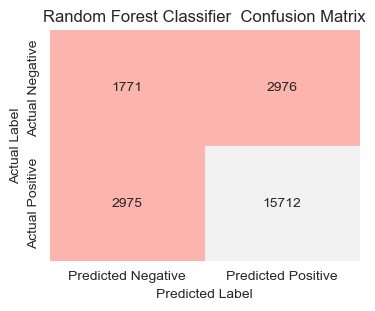

In [44]:
y_predict_rf_= rf_.predict(x_test)

# accuracy score
rf_accuracy_score = accuracy_score(y_test,y_predict_rf_)
print('Random Forest Classifier Accuracy score is :',rf_accuracy_score)

print('_'*100)

## ROC AUC Score
rf_roc = roc_auc_score(y_test,y_predict_rf_)
print("Random Forest Classifier  roc_auc_score :", rf_roc)

print('_'*100)

print('Random Forest Classifier Classification Report: \n\n', classification_report(y_test,y_predict_rf_))

print('_'*100)

# confusion matrix
rf_confusion = confusion_matrix(y_test,y_predict_rf_)
print('_'*100)


# Plotting the confusion matrix heatmap
plt.figure(figsize=(4,3))
sns.heatmap(rf_confusion, annot=True, fmt='g', cmap='Pastel1', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.title('Random Forest Classifier  Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [45]:
GB_ = GradientBoostingClassifier()
GB_.fit(x_train_resampled,y_train_resampled)

GradientBoostingClassifier()

GradientBoostingClassifier Accuracy score : 0.7611589997439617
____________________________________________________________________________________________________
GradientBoostingClassifier  roc_auc_score : 0.6102026240511352
____________________________________________________________________________________________________
GradientBoostingClassifier Classification Report: 

               precision    recall  f1-score   support

           0       0.40      0.36      0.38      4747
           1       0.84      0.86      0.85     18687

    accuracy                           0.76     23434
   macro avg       0.62      0.61      0.61     23434
weighted avg       0.75      0.76      0.76     23434

____________________________________________________________________________________________________
____________________________________________________________________________________________________
[[ 1692  3055]
 [ 2542 16145]]


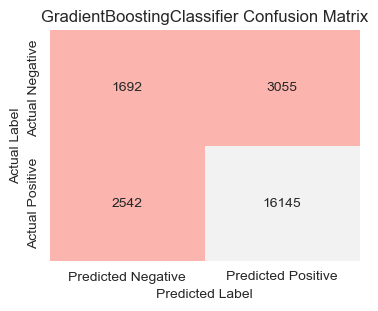

In [46]:
y_predict_GB_ = GB_.predict(x_test)

# Accuracy score
GB_accuracy_score = accuracy_score(y_test,y_predict_GB_)
print("GradientBoostingClassifier Accuracy score :" ,GB_accuracy_score)
print('_'*100)

## ROC AUC Score
GB_roc = roc_auc_score(y_test,y_predict_GB_)
print("GradientBoostingClassifier  roc_auc_score :", GB_roc)

print('_'*100)

print('GradientBoostingClassifier Classification Report: \n\n', classification_report(y_test,y_predict_GB_))

print('_'*100)

# confusion matrix
GB_confusion = confusion_matrix(y_test,y_predict_GB_)
print('_'*100)
print(GB_confusion)

# Plotting the confusion matrix heatmap
plt.figure(figsize=(4,3))
sns.heatmap(GB_confusion, annot=True, fmt='g', cmap='Pastel1', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.title('GradientBoostingClassifier Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

SVM Classifier Accuracy score : 0.7925663565759153
____________________________________________________________________________________________________
SVM Classifier  roc_auc_score : 0.5319147865231081
____________________________________________________________________________________________________
SVM Classifier Classification Report: 

               precision    recall  f1-score   support

           0       0.44      0.09      0.15      4747
           1       0.81      0.97      0.88     18687

    accuracy                           0.79     23434
   macro avg       0.63      0.53      0.52     23434
weighted avg       0.73      0.79      0.73     23434

____________________________________________________________________________________________________
____________________________________________________________________________________________________


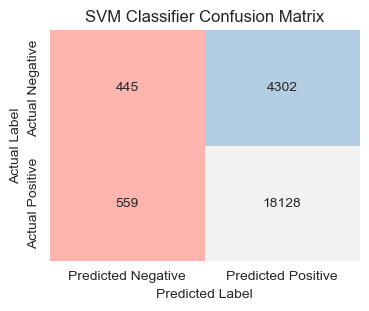

In [47]:
svc_ = SVC()
svc_.fit(x_train_resampled,y_train_resampled)
SVC()
y_predict_svc_ = svc_.predict(x_test)


# Accuracy score
svc_accuracy_score = accuracy_score(y_test,y_predict_svc_)
print("SVM Classifier Accuracy score :" ,svc_accuracy_score)
print('_'*100)

## ROC AUC Score
svc_roc = roc_auc_score(y_test,y_predict_svc_)
print("SVM Classifier  roc_auc_score :", svc_roc)

print('_'*100)

print('SVM Classifier Classification Report: \n\n', classification_report(y_test,y_predict_svc_))

print('_'*100)

# confusion matrix
svc_confusion = confusion_matrix(y_test,y_predict_svc_)
print('_'*100)


# Plotting the confusion matrix heatmap
plt.figure(figsize=(4,3))
sns.heatmap(svc_confusion, annot=True, fmt='g', cmap='Pastel1', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.title('SVM Classifier Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [48]:
knn_ = KNeighborsClassifier()
knn_.fit(x_train_resampled,y_train_resampled)

KNeighborsClassifier()

KNeighborsClassifier Accuracy score : 0.6623282410173252
____________________________________________________________________________________________________
KNeighborsClassifier  roc_auc_score : 0.5663847999963114
____________________________________________________________________________________________________
KNeighborsClassifier r Classification Report: 

               precision    recall  f1-score   support

           0       0.27      0.41      0.33      4747
           1       0.83      0.73      0.77     18687

    accuracy                           0.66     23434
   macro avg       0.55      0.57      0.55     23434
weighted avg       0.72      0.66      0.68     23434

____________________________________________________________________________________________________
____________________________________________________________________________________________________


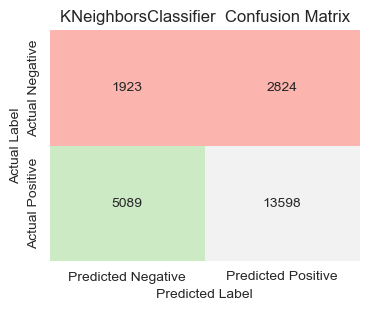

In [49]:
y_predict_knn_ = knn_.predict(x_test)


# Accuracy score
knn_accuracy_score = accuracy_score(y_test,y_predict_knn_ )
print("KNeighborsClassifier Accuracy score :" ,knn_accuracy_score)
print('_'*100)

## ROC AUC Score
knn_roc = roc_auc_score(y_test,y_predict_knn_ )
print("KNeighborsClassifier  roc_auc_score :", knn_roc)

print('_'*100)

print('KNeighborsClassifier r Classification Report: \n\n', classification_report(y_test,y_predict_knn_ ))

print('_'*100)

# confusion matrix
knn_confusion = confusion_matrix(y_test,y_predict_knn_ )
print('_'*100)


# Plotting the confusion matrix heatmap
plt.figure(figsize=(4,3))
sns.heatmap(knn_confusion, annot=True, fmt='g', cmap='Pastel1', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.title('KNeighborsClassifier  Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [50]:
xg_boost = XGBClassifier()
xg_boost.fit(x_train_resampled,y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

xg_boost Accuracy score : 0.7461807629939404
____________________________________________________________________________________________________
xg_boost  roc_auc_score : 0.6059968938932334
____________________________________________________________________________________________________
xg_boost Classification Report: 

               precision    recall  f1-score   support

           0       0.37      0.37      0.37      4747
           1       0.84      0.84      0.84     18687

    accuracy                           0.75     23434
   macro avg       0.61      0.61      0.61     23434
weighted avg       0.75      0.75      0.75     23434

____________________________________________________________________________________________________
____________________________________________________________________________________________________


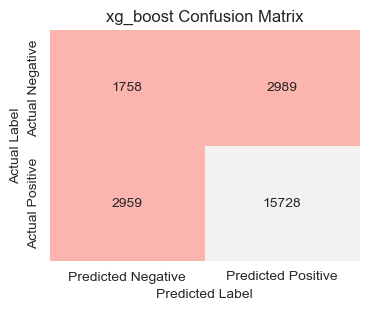

In [51]:
y_predict_xg_ = xg_boost.predict(x_test)


# Accuracy score
xg_accuracy_score = accuracy_score(y_test,y_predict_xg_ )
print("xg_boost Accuracy score :" ,xg_accuracy_score)
print('_'*100)

## ROC AUC Score
xg_roc = roc_auc_score(y_test,y_predict_xg_ )
print("xg_boost  roc_auc_score :", xg_roc)

print('_'*100)

print('xg_boost Classification Report: \n\n', classification_report(y_test,y_predict_xg_ ))

print('_'*100)

# confusion matrix
xg_confusion = confusion_matrix(y_test,y_predict_xg_ )
print('_'*100)


# Plotting the confusion matrix heatmap
plt.figure(figsize=(4,3))
sns.heatmap(xg_confusion, annot=True, fmt='g', cmap='Pastel1', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.title('xg_boost Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [52]:
NN_ = MLPClassifier()
NN_.fit(x_train_resampled,y_train_resampled)

MLPClassifier()

Neural network Accuracy score : 0.7432789963301186
____________________________________________________________________________________________________
Neural network  roc_auc_score : 0.6067703599535772
____________________________________________________________________________________________________
Neural network Classification Report: 

               precision    recall  f1-score   support

           0       0.37      0.38      0.37      4747
           1       0.84      0.84      0.84     18687

    accuracy                           0.74     23434
   macro avg       0.61      0.61      0.61     23434
weighted avg       0.75      0.74      0.74     23434

____________________________________________________________________________________________________
[[ 1791  2956]
 [ 3060 15627]]
____________________________________________________________________________________________________


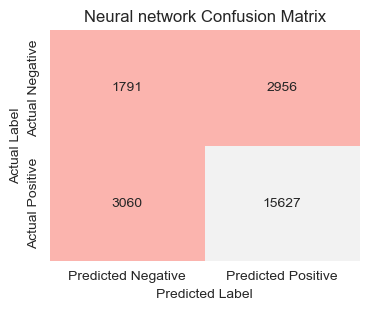

In [53]:
y_predict_NN_ = NN_.predict(x_test)
# Accuracy score
NN_accuracy_score = accuracy_score(y_test,y_predict_NN_ )
print("Neural network Accuracy score :" ,NN_accuracy_score)
print('_'*100)

## ROC AUC Score
NN_roc = roc_auc_score(y_test,y_predict_NN_ )
print("Neural network  roc_auc_score :",NN_roc)

print('_'*100)

print('Neural network Classification Report: \n\n', classification_report(y_test,y_predict_NN_ ))

print('_'*100)

# confusion matrix
NN_confusion = confusion_matrix(y_test,y_predict_NN_ )
print(NN_confusion)
print('_'*100)


# Plotting the confusion matrix heatmap
plt.figure(figsize=(4,3))
sns.heatmap(NN_confusion, annot=True, fmt='g', cmap='Pastel1', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.title('Neural network Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [54]:
## List of tuples containing (model, accuracy)
model_accuracy_list= [('Logistic_regression', lr_accuracy,lr_roc),
         ('Desicion Tree Classifier', dc_accuracy_score,dc_roc),
         ('Random Forest Classifier', rf_accuracy_score,dc_roc),
         ('Gradient Boosting Classifier', GB_accuracy_score,GB_roc),
         ('Support Vector Classifier', svc_accuracy_score,svc_roc),
          ('KNeighbours Classifier', knn_accuracy_score,knn_roc),
          ('XG Boosting Classifier', xg_accuracy_score,xg_roc),
                     ('Neural Networking Classifier',NN_accuracy_score,NN_roc)]

model_accuracy_list

[('Logistic_regression', 0.7517282580865409, 0.5967464034961134),
 ('Desicion Tree Classifier', 0.6244772552701203, 0.549801876824211),
 ('Random Forest Classifier', 0.7460527438764188, 0.549801876824211),
 ('Gradient Boosting Classifier', 0.7611589997439617, 0.6102026240511352),
 ('Support Vector Classifier', 0.7925663565759153, 0.5319147865231081),
 ('KNeighbours Classifier', 0.6623282410173252, 0.5663847999963114),
 ('XG Boosting Classifier', 0.7461807629939404, 0.6059968938932334),
 ('Neural Networking Classifier', 0.7432789963301186, 0.6067703599535772)]

In [59]:
# F1 score for Logistic Regression
lr_f1_score = f1_score(y_test, y_predict_lr_)

# F1 score for Decision Tree Classifier
dc_f1_score = f1_score(y_test, y_predict_dc_tree)

# F1 score for Random Forest Classifier
rf_f1_score = f1_score(y_test, y_predict_rf_)

# F1 score for Gradient Boosting Classifier
GB_f1_score = f1_score(y_test, y_predict_GB_)

# F1 score for Support Vector Classifier
svc_f1_score = f1_score(y_test, y_predict_svc_)

# F1 score for KNeighbours Classifier
knn_f1_score = f1_score(y_test, y_predict_knn_)

# F1 score for XG Boosting Classifier
xg_f1_score = f1_score(y_test, y_predict_xg_)

# F1 score for Neural Networking Classifier
NN_f1_score = f1_score(y_test, y_predict_NN_)

In [60]:
# List of tuples containing (model, F1 score)
model_f1_score_list = [
    ('Logistic Regression', lr_f1_score),
    ('Decision Tree Classifier', dc_f1_score),
    ('Random Forest Classifier', rf_f1_score),
    ('Gradient Boosting Classifier', GB_f1_score),
    ('Support Vector Classifier', svc_f1_score),
    ('KNeighbours Classifier', knn_f1_score),
    ('XG Boosting Classifier', xg_f1_score),
    ('Neural Networking Classifier', NN_f1_score)
]

# Initialize variables to store the best model and its F1 score
best_model_f1 = None
best_f1_score = 0.0

# Find the best model with the highest F1 score
for model, f1_score in model_f1_score_list:
    if f1_score > best_f1_score:
        best_f1_score = f1_score
        best_model_f1 = model

# Display the best model with its F1 score
if best_model_f1 is not None:
    print("Best Model (based on F1 score):", best_model_f1)
    print('-'*50)
    print("F1 score of the Best Model:", best_f1_score)
else:
    print("No model met the F1 score threshold.")


Best Model (based on F1 score): Support Vector Classifier
--------------------------------------------------
F1 score of the Best Model: 0.8817763941921833


In [61]:
## Threshold for minimum accuracy 
min_accuracy_threshold = 0.75

best_model = None
best_accuracy = 0.0
best_f1_score = None

## Find the best model with the highest accuracy
for model, accuracy, roc_score in model_accuracy_list:
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_roc = roc_score
        best_f1_score=f1_score

## Best Model Display
if best_model is not None:
    print("Best Model:", best_model)
    print('-'*50)
    print("Validation Accuracy of the Best Model:", best_accuracy)
    print('-'*50)
    print('ROC AUC Score of the Best Model:', best_roc)
    print('-'*50)
    print("F1 score of the Best Model:", best_f1_score)
    print('-'*50)
else:
    print("No model met the F1 score threshold.")

Best Model: Support Vector Classifier
--------------------------------------------------
Validation Accuracy of the Best Model: 0.7925663565759153
--------------------------------------------------
ROC AUC Score of the Best Model: 0.5319147865231081
--------------------------------------------------
F1 score of the Best Model: 0.8385833109739738
--------------------------------------------------


## Conclution:

As per the Best Model Display, Support vector Classifier is the best Model.

Validation Accuracy of the Best Model: 0.7925663565759153
--------------------------------------------------
ROC AUC Score of the Best Model: 0.5319147865231081
--------------------------------------------------
F1 score of the Best Model: 0.8385833109739738
--------------------------------------------------